# NUMBER RECOGNITION USING NUERAL NETWORK(MPL Classifier)

# IMPORTING NECCESARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the MNIST dataset from sklearn

from sklearn import datasets
digits = datasets.load_digits()

In [3]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
data = pd.DataFrame(data=digits.data, columns=[f'pixel_{i}' for i in range(digits.data.shape[1])])
target = pd.Series(digits.target, name='target')
df = pd.concat([data, target], axis=1)

In [6]:
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [7]:
df.shape

(1797, 65)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pixel_0   1797 non-null   float64
 1   pixel_1   1797 non-null   float64
 2   pixel_2   1797 non-null   float64
 3   pixel_3   1797 non-null   float64
 4   pixel_4   1797 non-null   float64
 5   pixel_5   1797 non-null   float64
 6   pixel_6   1797 non-null   float64
 7   pixel_7   1797 non-null   float64
 8   pixel_8   1797 non-null   float64
 9   pixel_9   1797 non-null   float64
 10  pixel_10  1797 non-null   float64
 11  pixel_11  1797 non-null   float64
 12  pixel_12  1797 non-null   float64
 13  pixel_13  1797 non-null   float64
 14  pixel_14  1797 non-null   float64
 15  pixel_15  1797 non-null   float64
 16  pixel_16  1797 non-null   float64
 17  pixel_17  1797 non-null   float64
 18  pixel_18  1797 non-null   float64
 19  pixel_19  1797 non-null   float64
 20  pixel_20  1797 non-null   floa

In [9]:
df.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [10]:
df.corr()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
pixel_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel_1,NaN,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,...,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889,-0.051834
pixel_2,NaN,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,...,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523,-0.011836
pixel_3,NaN,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,...,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971,-0.011489
pixel_4,NaN,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,...,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349,0.100801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_60,NaN,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,...,0.105101,0.005697,-0.117908,-0.207957,0.058390,1.000000,0.609515,0.243305,0.103015,-0.196083
pixel_61,NaN,-0.029870,-0.041183,-0.054936,-0.215809,-0.268818,-0.304111,-0.141174,0.033409,0.071488,...,0.262795,-0.003056,-0.043889,-0.091839,-0.094956,0.609515,1.000000,0.648328,0.261991,-0.079100
pixel_62,NaN,0.026547,0.072599,0.053437,-0.250699,-0.267659,-0.178945,-0.063220,0.020689,0.111569,...,0.511726,-0.011932,0.014557,0.035369,0.006849,0.243305,0.648328,1.000000,0.620428,-0.114007
pixel_63,NaN,-0.043889,0.082523,0.081971,-0.215349,-0.167727,-0.080309,-0.024505,-0.005226,-0.001404,...,0.563989,-0.004625,-0.047089,0.031193,0.099671,0.103015,0.261991,0.620428,1.000000,-0.181929


Number of samples: 1797
Image shape: (8, 8)


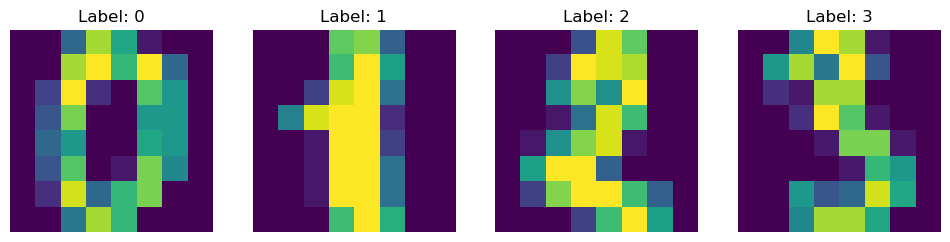

In [11]:
# Plotting the Image Digits in the Dataset

print("Number of samples:", len(df))
print("Image shape:", digits.images[3].shape)
plt.figure(figsize = (12, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(digits.images[i])
    plt.title(f"Label: {df['target'][i]}")
    plt.axis('off')
plt.show()

# PREPARING THE TRAIN AND TEST SET

In [12]:
Train_Data = df.drop('target', axis = 1)
X = Train_Data.values

y = df['target'].values

In [13]:
print(X[:10])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.

In [14]:
print(y[:10])

[0 1 2 3 4 5 6 7 8 9]


# SPLITTING INTO TRAINING AND TESTING SETS

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [16]:
len(X_train)

1437

In [17]:
len(X_test)

360

# TRAINING THE MODEL WITH NUERAL NETWORK (MLP Classifier)

In [18]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50,), max_iter=500)

# PREDICTING THE TEST RESULT 

In [19]:
print('The Prediction for this label: ', clf.predict([[0, 0,  0,  4, 15, 12,  0,  0,  0,  0,  3, 16, 15, 14,  0,  0,  0,  0, 8, 13,  8, 16, 
                                                       0,  0,  0,  0,  1,  6, 15, 11,  0,  0,  0,  1,  8, 13,
                                                       15, 1,  0,  0,  0,  9, 16, 16,  5,  0,  0,  0,  0,  3, 13, 16, 16, 11,
                                                        5, 0, 0, 0, 0, 3, 11, 16, 9, 0]]))

The Prediction for this label:  [2]


In [20]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 7 9 5 8 1 3 3 7 0 9 4 7 4 0 1 1 8 1 3 7 8 4 6 1 0 1 0 5 4 7 1 6 7 8 4 3
 7 4 0 5 9 0 4 8 7 4 3 6 3 9 2 2 5 7 3 8 8 3 8 6 6 8 6 8 5 0 5 3 5 0 7 3 2
 9 9 3 0 2 5 5 9 2 4 5 9 7 7 2 3 0 4 6 1 9 7 1 9 8 3 4 6 7 8 1 8 4 0 1 3 6
 9 5 5 1 6 0 6 2 8 9 4 1 3 4 0 6 7 7 9 8 7 8 2 4 2 5 2 3 8 8 9 8 0 0 6 2 6
 9 0 9 0 0 8 7 5 3 4 0 5 6 2 6 0 4 8 7 9 2 4 3 6 4 4 5 2 8 0 7 7 3 2 2 9 0
 7 2 1 6 7 9 1 5 1 6 4 6 1 3 6 1 0 8 6 5 8 8 9 1 5 1 2 6 7 5 0 1 2 4 7 0 9
 6 4 7 6 5 1 2 5 5 4 6 1 7 6 1 8 9 6 2 8 5 8 3 3 9 0 3 7 9 9 1 7 0 0 5 7 3
 6 3 8 6 3 6 9 8 3 3 4 4 0 7 1 5 6 1 4 1 4 5 6 3 7 4 5 2 5 6 4 0 4 2 2 3 3
 2 9 0 9 7 4 9 8 6 3 2 4 9 4 2 4 4 8 7 0 0 1 6 3 6 8 5 6 1 3 8 3 6 3 8 6 6
 7 7 6 4 6 4 4 1 7 9 0 1 7 4 8 5 5 2 5 3 4 6 3 7 0 0 8]


In [21]:
actual_predict = pd.DataFrame({
    'Actual' : y_test,
    'Predicted' : y_pred
})

print('The Difference Between Actual and Predicted.')
actual_predict.value_counts().to_frame(name = 'counts')

The Difference Between Actual and Predicted.


,,counts
Actual,Predicted,
6,6,44
4,4,41
7,7,39
3,3,38
0,0,37
8,8,35
5,5,32
1,1,31
9,9,30


As you can see the last 6 numbers of the actual and predicted model, prediction gone wrong.

# EVALUATING THE MODEL WITH CONFUSION MATRIX, ACCURACY SCORE AND CLASSIFICATION REPORT

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_pred)
print('The Confusion Matrix of the Model is:\n', cm)
print()
print('The Accuracy Score of the given model performed is:\n', accuracy_score(y_test, y_pred))

The Confusion Matrix of the Model is:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  0  0]
 [ 0  0 28  0  0  0  0  0  0  0]
 [ 0  0  0 38  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  1]
 [ 0  1  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  1  0]
 [ 0  0  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  1  0  0  1 30]]

The Accuracy Score of the given model performed is:
 0.9861111111111112


In [23]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        41
           5       0.97      0.97      0.97        33
           6       1.00      0.98      0.99        45
           7       1.00      0.97      0.99        40
           8       0.95      1.00      0.97        35
           9       0.97      0.94      0.95        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



# VISUALIZING THE TEST IMAGES AND PREDICTED IMAGES

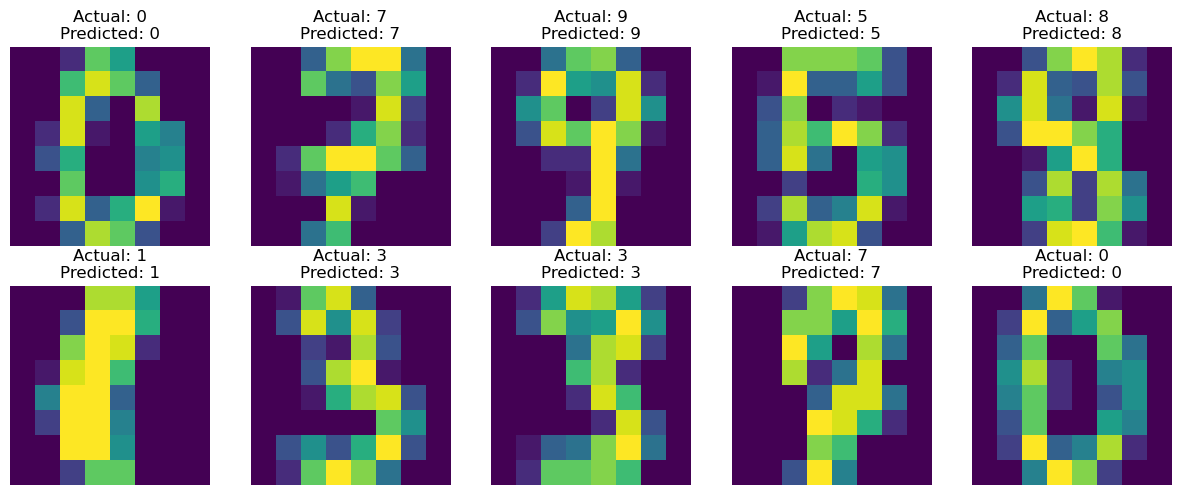

In [24]:
plt.figure(figsize=(15, 15))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8))
    plt.title(f"Actual: {y_test[i]}\nPredicted: {y_pred[i]}")
    plt.axis('off')
plt.show()

# PLOTTING THE HEATMAP OF CONFUSION MATRIX

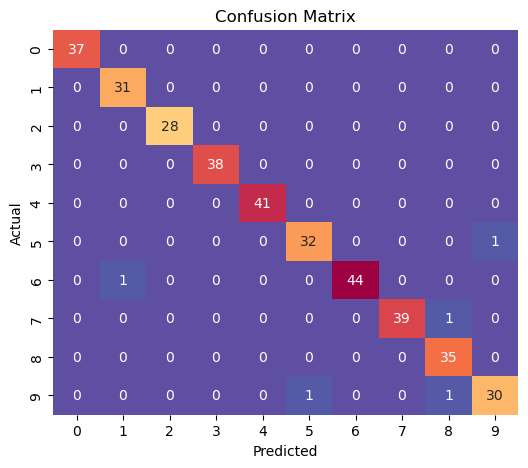

In [25]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Spectral_r', cbar = False, xticklabels = range(10), yticklabels = range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()